<a href="https://colab.research.google.com/github/shinjangwoon/TIL/blob/master/scikit-learn/The_Predictive_Modeling_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_tabular_data_exploration

In [ ]:
import pandas as pd

php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phpMawTba.csv')

- 이 데이터의 목표는 연령, 고용, 교육, 가족 정보 등과 같은 데이터에서 한 사람이 연간 5만 달러 이상을 벌고 있는지 예측하는 것입니다.

In [ ]:
php.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
php.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- class라는 열은 대상 변수(예측하려는 변수)입니다. 현재 가능한 클래스는 <=50k(저수익), >50k(고수익)입니다. 
- 따라서 결과 예측 문제는 이진 분류 문제이며, 다른 열을 모델의 입력 변수로 사용합니다.

In [ ]:
target_column = "class"
php[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

- 클래스는 약간 불균형합니다. 즉, 다른 클래스에 비해 하나 이상의 클래스 샘플이 더 많습니다. 
 
- 클래스 불균형은 실제로 자주 발생하며, 예측 모델을 구축할 때 특별한 기술이 필요할 수 있습니다.


In [ ]:
numerical_columns = [
    "age", "education-num", "capital-gain", "capital-loss",
    "hours-per-week"]
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"]
all_columns = numerical_columns + categorical_columns + [target_column]

php = php[all_columns]

In [ ]:
print(f"The dataset contains {php.shape[0]} samples and "
      f"{php.shape[1]} columns")

The dataset contains 48842 samples and 14 columns


In [ ]:
print(f"The dataset contains {php.shape[1] - 1} features")

The dataset contains 13 features


## 데이터 시각화

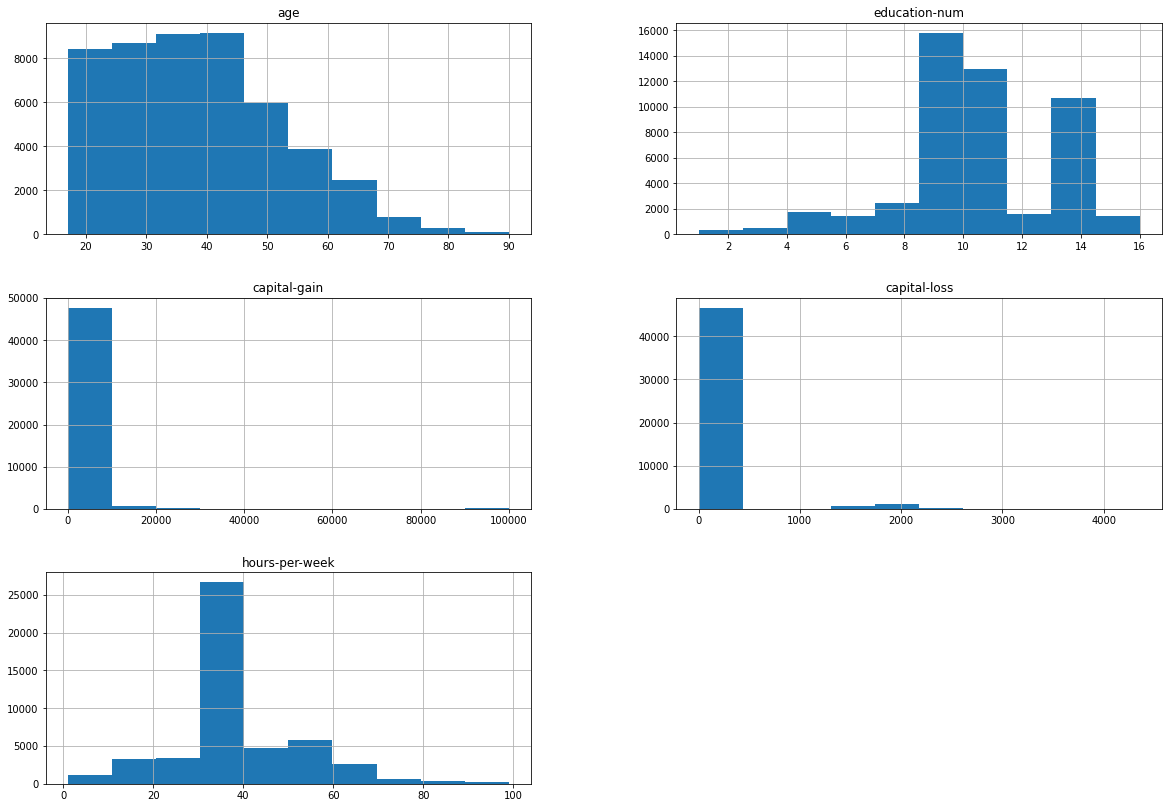

In [ ]:
_ = php.hist(figsize=(20, 14))

- 이전 셀에서는 _ = func() 패턴을 사용했습니다. 
- 이 경우에는 그다지 유용하지 않은 func() 의 출력을 표시하지 않기 위해 이 작업을 수행하였습니다. 
- 관례상, python에서 밑줄 변수는 우리가 관심이 없는 결과를 저장하기 위한 "쓰레기" 변수로 사용됩니다.

- "age" : 'age > 70' 이상이 이 데이터셋에 많지 않으므로 은퇴한 사람은 필터링 된 것을 알 수 있습니다.
- "hours-per-week" : 주당 40시간정도가 제일 높은 것을 알 수 있습니다.
- "capital-gain" and "capital-loss"는 0에 가깝습니다.

In [ ]:
php["sex"].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [ ]:
php['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [ ]:
## education과 education-num의 관계
pd.crosstab(index=php['education'], columns=php['education-num']) 

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


- "education"과 "education-num"이 동일한 정보를 제공한다는 것을 보여줍니다.
ex) "education-num=2"는 "education=1st-4th"와 같습니다.
실제로 이는 정보 손실 없이 "education-num"을 제거할 수 있음을 의미합니다

* 중복(또는 높은 상관 관계)열이 있는 것은 기계 학습 알고리즘에 문제가 될 수 있습니다.

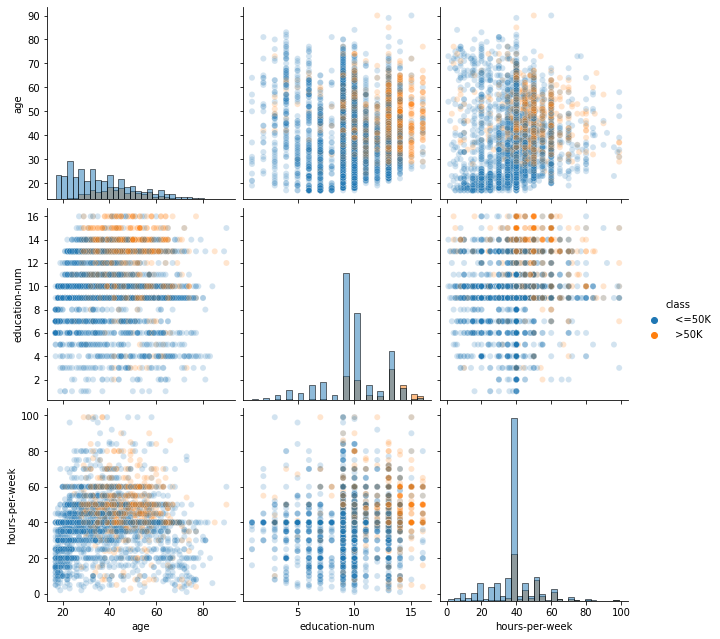

In [ ]:
'''
pairplot을 수행하고, class에 따라 각 변수가 어떻게 다른지 보여주는 것입니다.
대각선을 따라 플롯은 각 class에 대한 개별 변수의 분포를 보여줍니다.
비대각선의 플롯은 변수간의 흥미로운 상호 작용을 나타낼 수 있습니다.
'''
import seaborn as sns

n_sample_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=php[:n_sample_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha":0.2},
    height=3,
    diag_kind='hist',
    diag_kws={"bins":30},
)

## 결정 규칙 만들기
- 누가 고소득이고 누가 저소득인지 예측해보는 규칙을 만들어봅니다. 
- 예를 들어, 'hours-per-week'와 'age' 조합에 집중해봅니다.

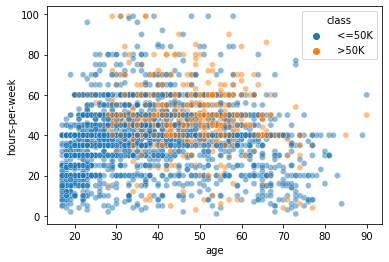

In [ ]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=php[:n_sample_to_plot],
    hue='class',
    alpha=0.5,

)

- 점은 dataset에서 'hours-per-week'와 'age'의 분포를 보여줍니다.
- 파란색 점은 저소득을 의미하며, 주황색 점은 고소득을 의미합니다.
- 이 plot은 pairplot에서 왼쪽 하단 플롯과 동일합니다.

- 이 plot에서 어떤 클래스를 예측해야 하는지 쉽게 결정할 수 있도록 
주로 단일 클래스를 포함하는 영역을 찾으려고 노력해야 합니다.


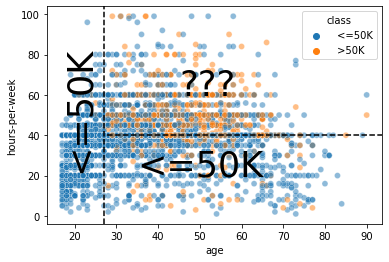

In [ ]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y='hours-per-week',
    data=php[:n_sample_to_plot],
    hue='class',
    alpha=0.5,
)
age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

- 'age < 27' 인 왼쪽 영역은 예측이 저소득입니다.
 물론 많은 파란색 점이 있지만 주황색 점은 볼 수 없습니다.
- 'age > 27 and hours-per-week < 40'인 오른쪽 하단 영역은 저소득입니다.
많은 파란색 점이 있지만 조금씩 주황색 점도 보입니다. 
- 'age > 27 and hours-per-week > 40'인 오른쪽 상단 영역은 파란색 점과 주확색 점이 많습니다.
이 지역을 예측해야합니다. 

# 연습
- culmen 길이와 culmen 깊이의 두 가지 신체 측정을 ​​기반으로 펭귄 종을 예측해보기

*** sciki-learn 공부 중 제공 jupyter에서 해보았으나 csv가 가져오기 애매하여 코드만 적어둠


In [ ]:
# 데이터 불러오기
# import pandas as pd
# php = pd.read_csv('../datasets/penguins_classification.csv')
# php.head()

In [ ]:
# 수치형 컬럼과 자료형 컬럼 나누기
# numerical_columns = [
#     "Culmen Length(mm)", "Culmen Depth(mm)"
# ]
# catrgorical_columns = [
#     "Species"
# ]

In [ ]:
# 데이터 세트에서 펭귄 종류와 수 찾기
# php["Species"].value_counts()

In [ ]:
# 수치형 컬럼 시각화
# _ = php.hist(figsize=(10, 4))

In [ ]:
# class별 분포 시각화
# import seaborn as sns
# sns.pairplot(php, hue='Species', height=3)

# 02_Fitting_a_scikit-learn_model_on_numerical_data


In [ ]:
import pandas as pd

php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census-numeric.csv')

In [ ]:
php.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


## 데이터와 타겟 분리

In [ ]:
target_name = "class"
target = php[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [ ]:
data = php.drop(columns=[target_name, ])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [ ]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [ ]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

The dataset contains 39073 samples and 4 features


## 모델 학습 및 예측(K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

In [ ]:
target_predicted = model.predict(data)

In [ ]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [ ]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [ ]:
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [ ]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


- 첫 번째 예측이 틀린 것을 알 수가 있음

In [ ]:
(target == target_predicted).mean()

0.8242776341719346

- 약 82% 정확도

## Train-test data split

In [ ]:
php_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census-numeric-test.csv')
php_test.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,20,0,0,35,<=50K
1,53,0,0,72,>50K
2,41,0,0,50,>50K
3,20,0,0,40,<=50K
4,25,0,0,40,<=50K


In [ ]:
target_test = php_test[target_name]
data_test = php_test.drop(columns=[target_name, ])

In [ ]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 9769 samples and 4 features


In [ ]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.804


## Working with numerical data

In [ ]:
import pandas as pd
php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census-numeric.csv')
php.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [ ]:
# 분리
data, target = php.drop(columns='class'), php['class']


In [ ]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [ ]:
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

### Identify numerical data

In [ ]:
data.dtypes

age               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [ ]:
data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [ ]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [ ]:
numerical_columns = ['age','capital-gain','capital-loss','hours-per-week']
data[numerical_columns].head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


- 데이터 세트를 숫자열로만 제한했으므로 이 숫자를 분석하여
숫자가 나타내는 것을 파악할 수 있습니다.
- 두 가지 사용 유형을 식별할 수 있는데
첫 번째 열인 'age'는 설명이 필요없고 값이 연속적이라는 것을 알 수 있습니다.
즉, 주어진 범위에서 임의의 숫자를 사용할 수 있습니다.
이 범위가 무엇인지 알아보겠습니다.

In [ ]:
data['age'].describe()

count    39073.000000
mean        38.630742
std         13.703652
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
data_numeric = data[numerical_columns]

### Train-test split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

- scikit-learn에서 random_state 매개변수를 설정하면
난수 생성기를 사용할 때 결정론적 결과를 얻을 수 있습니다.

- train_test_split의 경우 무작위성은 데이터 셔플링에서 비롯되며,
이는 데이터 세트가 train 과 test set로 분할되는 방식을 결정합니다.

- train_test_split 함수를 호출할 때 테스트 세트에 샘플의 25%를 보유하고
나머지 샘플(75%)을 훈련 세트에서 사용할 수 있도록 지정하였습니다.


In [ ]:
print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 9769 => 25.0% of the original set


In [ ]:
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in training: 29304 => 75.0% of the original set


In [ ]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(data_train, target_train)

LogisticRegression()

In [ ]:
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.801


- 약 80% 정도의 확률로 로지스틱 회귀분석을 통해 사람의 적정 소득을 예측하였습니다.
 

## Preprocessing for numerical features

In [ ]:
import pandas as pd
php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census.csv')
php.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
target_name = 'class'
target = php[target_name]
data = php.drop(columns=target_name)

In [ ]:
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [ ]:
# train, test 분리
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)


### Model fitting with preprocessing

In [ ]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


- 기능을 확장하는 몇 가지 이유
    - 샘플들의 거리에 의존하는(ex.K-NN)은 각 특징이 거리 계산에 거의 동일하게
    기여하도록 정규화된 특징에 대해 학습해야 합니다.
    - 로지스틱 회귀와 같은 많은 모델은 최적의 매개변수를 찾기 위해 
    'numerical solver'(경사하강법 기반)를 사용합니다.
    이 solver는 기능의 크기가 조정될 때 더 빠르게 수렴합니다.


- 기계 학습 모델에 기능 확장잉 필요한지 여부는 model family에 따라 다름
- 로지스틱 회귀와 같은 선형 모델은 일반적으로 기능 크기 조정의 이점이 있는 반면,
의사 결정 트리와 같은 모델은 이러한 사전 처리가 필요하지 않습니다.


- StandardScaler라는 scikit-learn 변환기를 사용하여 이러한 정규화를 적용하는 방법을 보여줍니다.
이 변환기는 각 기능을 개별적으로 이동하고 크기를 조정하여 모두 0-mean 및 단위 표준 편차를 갖도록 합니다.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [ ]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [ ]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

- attribute가 데이터에서 학습된 경우 해당 이름은 StandardScaler의 mean_ 및 scale_ 에서와 같이 밑줄(ex._)로 끝납니다

- 데이터 스케일링은 각 기능에 개별적으로 적용됩니다(즉, 데이터 매트릭스의 각 열)
각 기능에 대해 평균을 빼고 표준 편차로 나눕니다.

- fit method를 호출한 후에는 메서드 변환을 호출하여 데이터 변환을 수행할 수 있음


In [ ]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

- 변환 방법
    - 변환 함수라고 하는 미리 정의된 함수를 사용하고 모델 상태와 입력 데이터를
    사용합니다.
    그러나 예측을 출력하는 대신 변환 방법의 작업은 입력 데이터의 변환된
    버전을 출력하는 것입니다.

- 마지막으로 fit_transform method는 fit을 호출한 다음 변환하는 shorthand method입니다.


In [ ]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [ ]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-1.263553e-16,-1.708425e-15,-1.652358e-15,1.146502e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


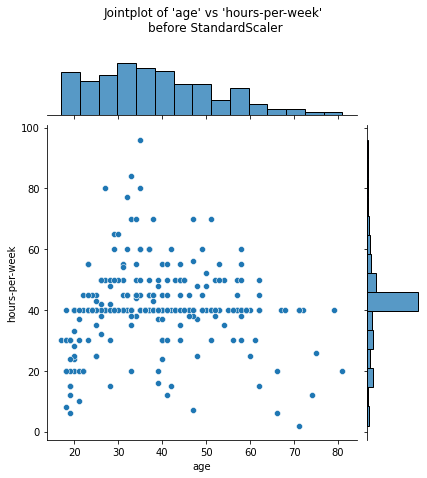

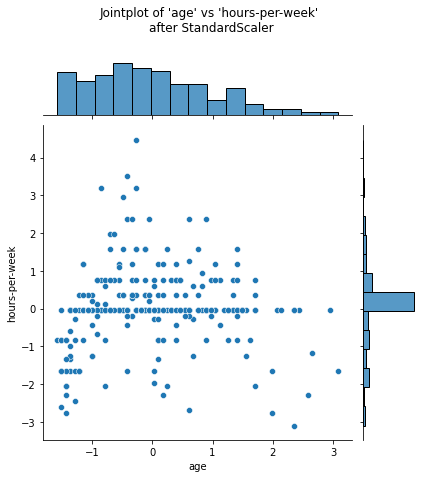

In [ ]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=data_train[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

- make_pipeline 함수에서는 각 단계의 이름을 지을 필요가 없음. 실제로 제공된 클래스 이름에 따라 자동으로 핳당되었습니다.


In [ ]:
model.named_steps

{'logisticregression': LogisticRegression(),
 'standardscaler': StandardScaler()}

- 이 predictive pipeline은 예측자와 동일한 방법인 fit 및 predict(및 추가로 predict_proba, decision_function 또는 score)를 노출합니다.

In [ ]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [ ]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.807 with a fitting time of 0.125 seconds in 12 iterations


In [ ]:
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.807 with a fitting time of 0.460 seconds in 59 iterations


- 로지스틱 회귀를 훈련하기 전에 데이터를 스케일링하는 것이
 계산 성능 측면에서 이점이 있음을 알 수 있습니다. 
- 실제로 반복 횟수와 훈련 시간이 감소했고, 일반화 성능은 두 모델이 
수렴된 이후에 변경되지 않았습니다.


## Model evaluation using cross-validation

In [ ]:
import pandas as pd
php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census.csv')
php.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
target_name = 'class'
target = php[target_name]
data = php.drop(columns=target_name)

In [ ]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

### make_pipeline 도구를 사용하여 모델을 생성
- 교차 검증의 모든 반복에서 전처리 및 추정기를 연결할 수 있습니다

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
%%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

CPU times: user 1.16 s, sys: 745 ms, total: 1.9 s
Wall time: 1.12 s


- cross_validate의 출력은 기본적으로 3개의 항목을 포함하는  Python dictionary입니다
    - the time to train the model on the training data for each fold,
    - the time to predict with the model on the testing data for each fold,
    - the default score on the testing data for each fold.

In [ ]:
scores = cv_result['test_score']
print(
    'accuracy:'f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

accuracy:0.800 +/- 0.003


# Handling categorical data

## Encoding of categorical variables
- ordinal encoding and one-hot encoding
    - 범주형 변수를 인코딩하여 처리하는 일반적인 방법

In [1]:
import pandas as pd
php = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult-census.csv')
php = php.drop(columns='education-num')

target_name = 'class'
target = php[target_name]

data = php.drop(columns=[target_name])

In [2]:
data["native-country"].value_counts().sort_index()

 ?                               857
 Cambodia                         28
 Canada                          182
 China                           122
 Columbia                         85
 Cuba                            138
 Dominican-Republic              103
 Ecuador                          45
 El-Salvador                     155
 England                         127
 France                           38
 Germany                         206
 Greece                           49
 Guatemala                        88
 Haiti                            75
 Holand-Netherlands                1
 Honduras                         20
 Hong                             30
 Hungary                          19
 India                           151
 Iran                             59
 Ireland                          37
 Italy                           105
 Jamaica                         106
 Japan                            92
 Laos                             23
 Mexico                          951
 

In [3]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [4]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [5]:
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [6]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 8 features
